# Geração de Gráficos e Análises

## Importando base de dados 

In [2]:
import pandas as pd

In [3]:
amazon = pd.read_csv('./datasets/amazon/amazon.csv')
submarino = pd.read_csv('./datasets/submarino/submarino.csv')
americanas = pd.read_csv('./datasets/americanas/americanas.csv')
casas_bahia = pd.read_csv('./datasets/casas_bahia/casasbahia.csv')
magalu = pd.read_csv('./datasets/magalu/magalu.csv')

#### Tratando dados amazon

In [4]:
amazon = amazon[amazon['Preco'] > 1200]

## Obtenção de amostra

In [5]:
amazon = amazon.sample(213)
submarino = submarino.sample(213)
americanas = americanas.sample(213)
casas_bahia = casas_bahia.sample(213)
magalu = magalu.sample(213)

## Checando informações

In [6]:
print('Amazon: O tamanho desse dataset é: ',amazon.shape)
print('Submarino: O tamanho desse dataset é: ',submarino.shape)
print('Americanas: O tamanho desse dataset é: ',americanas.shape)
print('Casas Bahia: O tamanho desse dataset é: ',casas_bahia.shape)
print('Magalu: O tamanho desse dataset é: ',magalu.shape)

Amazon: O tamanho desse dataset é:  (213, 3)
Submarino: O tamanho desse dataset é:  (213, 3)
Americanas: O tamanho desse dataset é:  (213, 3)
Casas Bahia: O tamanho desse dataset é:  (213, 3)
Magalu: O tamanho desse dataset é:  (213, 3)


## Criação de novas colunas

In [7]:
#coluna: dt['loja']

amazon['Loja'] = 'Amazon'
submarino['Loja'] = 'Submarino'
americanas['Loja'] = 'Americanas'
casas_bahia['Loja'] = 'Casas Bahia'
magalu['Loja'] = 'Magalu'

## Juntando as Tabelas

In [8]:
lojas = pd.concat([amazon, submarino, americanas, casas_bahia, magalu])

In [9]:
#deletando colunas indesejadas
lojas.drop(['Unnamed: 0', 'ID'], inplace = True, axis = 1)
lojas.index = range(lojas.shape[0])

In [10]:
#coluna: dt['faixa']

In [18]:
analise_lojas = lojas.groupby('Loja').describe()['Preco']
analise_lojas = analise_lojas.drop('count', axis = 1)
#adquirindo a media_geral
media_geral = analise_lojas.mean().mean()
analise_lojas

,mean,std,min,25%,50%,75%,max
Loja,,,,,,,
Amazon,3333.051643,2149.412048,1299.00,1699.00,2429.00,4199.00,8990.00
Americanas,1972.520704,404.733809,1231.12,1680.33,1899.56,2240.99,3519.99
Casas Bahia,2505.865446,1259.135281,719.90,1750.00,2288.64,3060.44,15011.84
Magalu,2444.667371,1134.730022,1203.14,1753.67,2268.41,2755.19,12374.10
Submarino,1836.532723,2211.209317,1208.07,1359.51,1486.48,1582.13,22950.00


## Transformando a tabela describe

In [12]:
import itertools

transform_describe = pd.DataFrame(columns=['Loja', 'Atributo', 'Valor'])
for Loja, atributo in itertools.product(analise_lojas.index, analise_lojas.columns):
    valor = analise_lojas.at[Loja, atributo]
    transform_describe = transform_describe.append({'Loja': Loja, 'Atributo': atributo, 'Valor': valor},
                           ignore_index=True)
    
transform_describe.head()

,Loja,Atributo,Valor
0,Amazon,mean,3333.051643
1,Amazon,std,2149.412048
2,Amazon,min,1299.000000
3,Amazon,25%,1699.000000
4,Amazon,50%,2429.000000


## Importando seaborn

In [13]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Catplot

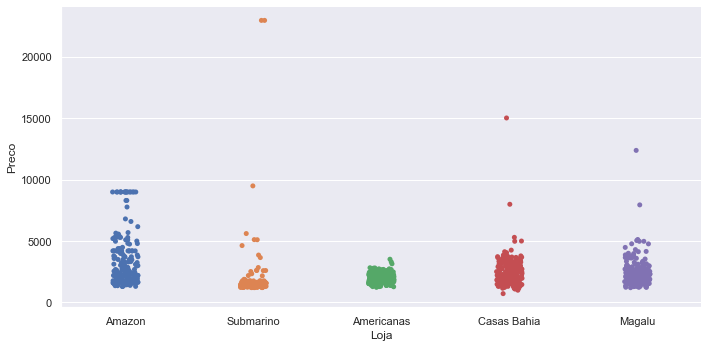

In [14]:
# catplot
figure_catplot = sns.catplot(x='Loja', y = 'Preco', data = lojas, height = 5, aspect = 2)

### Violinplot 

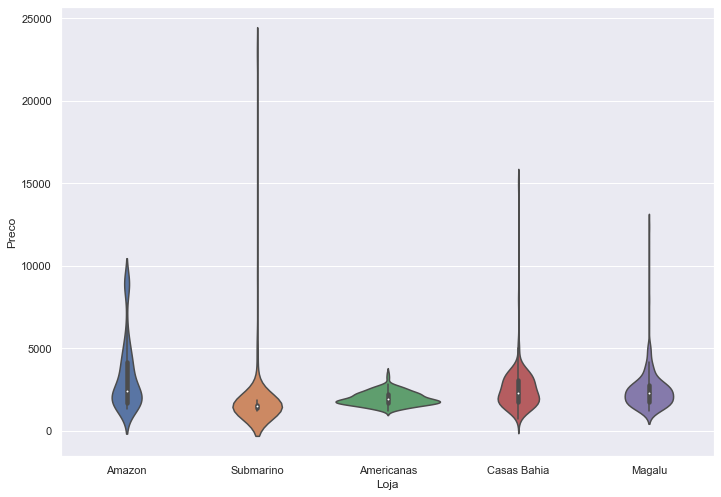

In [15]:
# violinplot
figure_violinplot = sns.violinplot(x='Loja',y='Preco',data = lojas)

### Boxplot

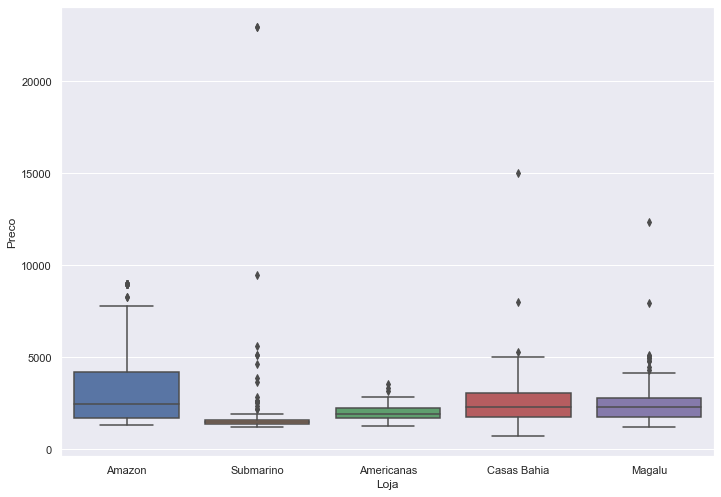

In [16]:
# boxplot
figure_boxplot = sns.boxplot(x='Loja',y='Preco', data = lojas)

### Gráfico de Barras

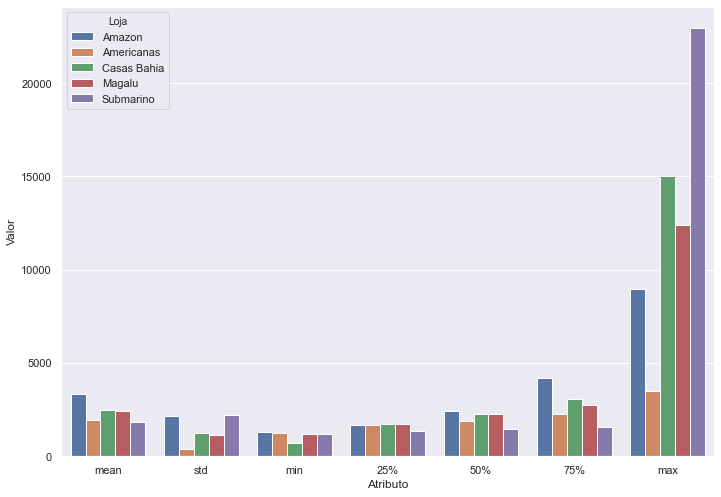

In [17]:
# gráfico de barras
figure_barplot = sns.barplot(x= 'Atributo', y = 'Valor', hue = 'Loja', data = transform_describe)